IMPORT LIBRARY

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

IMPORT DATASET

In [18]:
annonimized = pd.read_csv("annonimized.csv")
diemTH = pd.read_csv("th-public.csv")
diemQT = pd.read_csv("qt.csv")
diemCK = pd.read_csv("ck-public.csv")
print(annonimized.shape)
print(diemTH.shape) 

annonimized.head()

(295198, 11)
(761, 2)


,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


DATASET OVERVIEW

In [19]:
# Explore annonimized dataset structure
print("=== Annonimized Dataset Analysis ===")
print(f"Columns: {annonimized.columns.tolist()}")

# Check unique values for key columns
print(f"\nNumber of unique students: {annonimized['concat(\'it001\', username)'].nunique()}")
print(f"Number of unique assignments: {annonimized['concat(\'it001\',`assignment_id`)'].nunique()}")
print(f"Number of unique problems: {annonimized['concat(\'it001\',`problem_id`)'].nunique()}")

=== Annonimized Dataset Analysis ===
Columns: ["concat('it001',`assignment_id`)", "concat('it001',`problem_id`)", "concat('it001', username)", 'is_final', 'status', 'pre_score', 'coefficient', "concat('it001',`language_id`)", 'created_at', 'updated_at', 'judgement']

Number of unique students: 1489
Number of unique assignments: 203
Number of unique problems: 469


In [20]:
# Kiểm tra dữ liệu diemTH
print("=== TH Dataset Analysis ===")
print(f"TH dataset shape: {diemTH.shape}")
print(f"TH columns: {diemTH.columns.tolist()}")

# Chuyển đổi cột TH thành số
diemTH['TH'] = pd.to_numeric(diemTH['TH'], errors='coerce')


=== TH Dataset Analysis ===
TH dataset shape: (761, 2)
TH columns: ['hash', 'TH']


In [21]:
# Kiểm tra dữ liệu diemQT
print("=== QT Dataset Analysis ===")
print(f"QT dataset shape: {diemQT.shape}")
print(f"QT columns: {diemQT.columns.tolist()}")

# Chuyển đổi cột QT thành số
diemQT['QT'] = pd.to_numeric(diemQT['diemqt'], errors='coerce')


=== QT Dataset Analysis ===
QT dataset shape: (761, 2)
QT columns: ['hash', 'diemqt']


In [22]:
# Kiểm tra dữ liệu diemCK
print("=== CK Dataset Analysis ===")
print(f"CK dataset shape: {diemCK.shape}")
print(f"CK columns: {diemCK.columns.tolist()}")

# Chuyển đổi cột CK thành số
diemCK['CK'] = pd.to_numeric(diemCK['CK'], errors='coerce')


=== CK Dataset Analysis ===
CK dataset shape: (761, 2)
CK columns: ['hash', 'CK']


DATASET PREPROCESSING

In [23]:
import json

# Trích xuất thông tin cần thiết từ annonimized
annonimized_extracted = annonimized[[
    "concat('it001',`assignment_id`)",
    "concat('it001',`problem_id`)",
    "concat('it001', username)",
    "is_final",
    "status",
    "coefficient",
    "pre_score",
    "created_at",
    "updated_at",
    "judgement"
]].copy()

# Đổi tên cột cho dễ hiểu
annonimized_extracted.columns = [
    "assignment_id",
    "problem_id",
    "student",
    "is_final",
    "status",
    "late_coef",
    "score_percent",
    "submit_time",
    "grade_time",
    "judgement"
]

annonimized_extracted.head()

,assignment_id,problem_id,student,is_final,status,late_coef,score_percent,submit_time,grade_time,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,100,0,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,100,10000,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [24]:
# Tạo các features tổng hợp cho mỗi sinh viên
student_features = annonimized_extracted.groupby('student').agg(
    num_submissions=('student', 'count'),  # Tổng số lần nộp bài
    num_score_100=('score_percent', lambda x: (x == 10000).sum()),  # Số lần đạt 100% testcase
    num_unique_problems=('problem_id', 'nunique'),  # Số bài tập unique đã làm
    num_unique_assignments=('assignment_id', 'nunique'),  # Số assignment unique đã làm
    avg_score_percent=('score_percent', 'mean'),  # Điểm trung bình các lần nộp
    max_score_percent=('score_percent', 'max'),  # Điểm cao nhất đạt được
    avg_late_coef=('late_coef', 'mean'),  # Hệ số trễ trung bình
    num_final_submissions=('is_final', lambda x: (x == 1).sum()),  # Số lần nộp tính điểm
    total_status_ok=('status', lambda x: (x == "SCORE").sum()),  # Số lần code chạy được
).reset_index()

# Tính thêm các tỷ lệ
student_features['ratio_score_100'] = student_features['num_score_100'] / student_features['num_submissions']
student_features['ratio_final_submissions'] = student_features['num_final_submissions'] / student_features['num_submissions']
student_features['ratio_status_ok'] = student_features['total_status_ok'] / student_features['num_submissions']
student_features['avg_submissions_per_problem'] = student_features['num_submissions'] / student_features['num_unique_problems']

print("=== Student Features Created ===")
print(f"Number of students: {len(student_features)}")
print("\nFeature columns:")
for col in student_features.columns:
    print(f"- {col}")
    
print("\nFirst 5 students features:")
student_features.head()

=== Student Features Created ===
Number of students: 1489

Feature columns:
- student
- num_submissions
- num_score_100
- num_unique_problems
- num_unique_assignments
- avg_score_percent
- max_score_percent
- avg_late_coef
- num_final_submissions
- total_status_ok
- ratio_score_100
- ratio_final_submissions
- ratio_status_ok
- avg_submissions_per_problem

First 5 students features:


,student,num_submissions,num_score_100,num_unique_problems,num_unique_assignments,avg_score_percent,max_score_percent,avg_late_coef,num_final_submissions,total_status_ok,ratio_score_100,ratio_final_submissions,ratio_status_ok,avg_submissions_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,54,46,7,5504.149660,10000,100.000000,46,119,0.367347,0.312925,0.809524,3.195652
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,85,78,9,5488.552124,10000,100.000000,78,209,0.328185,0.301158,0.806950,3.320513
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,66,7,5973.753846,10000,100.000000,67,175,0.302564,0.343590,0.897436,2.954545
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,52,47,4,5952.760000,10000,100.000000,47,76,0.520000,0.470000,0.760000,2.127660
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,59,52,8,6474.448598,10000,97.196262,66,94,0.551402,0.616822,0.878505,2.057692


In [25]:
# Merge student_features với diemTH dựa trên student ID
merged_data = student_features.merge(diemTH[['hash', 'TH']], 
                                    how='left', 
                                    left_on='student', 
                                    right_on='hash')

# Merge student_features với diemQT dựa trên student ID
merged_data = merged_data.merge(diemQT[['hash', 'diemqt']], 
                                    how='left', 
                                    left_on='student', 
                                    right_on='hash')
# Merge student_features với diemCK dựa trên student ID
merged_data = merged_data.merge(diemCK[['hash', 'CK']], 
                                    how='left', 
                                    left_on='student', 
                                    right_on='hash')


# Convert diemqt to numeric before calculation
merged_data['diemqt'] = pd.to_numeric(merged_data['diemqt'], errors='coerce')
merged_data['TH'] = pd.to_numeric(merged_data['TH'], errors='coerce')
merged_data['CK'] = pd.to_numeric(merged_data['CK'], errors='coerce')

merged_data["TB"] = merged_data["diemqt"] * 0.2 + merged_data["TH"] * 0.4 + merged_data["CK"] * 0.4

# Xóa cột hash không cần thiết
merged_data = merged_data.drop(columns=['hash'])
merged_data = merged_data.drop(columns=['hash_x'])
merged_data = merged_data.drop(columns=['hash_y'])

print("\nFirst 5 rows of merged data:")
merged_data.head()


First 5 rows of merged data:


,student,num_submissions,num_score_100,num_unique_problems,num_unique_assignments,avg_score_percent,max_score_percent,avg_late_coef,num_final_submissions,total_status_ok,ratio_score_100,ratio_final_submissions,ratio_status_ok,avg_submissions_per_problem,TH,diemqt,CK,TB
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,54,46,7,5504.149660,10000,100.000000,46,119,0.367347,0.312925,0.809524,3.195652,5.0,7.5,5.5,5.7
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,85,78,9,5488.552124,10000,100.000000,78,209,0.328185,0.301158,0.806950,3.320513,8.5,7.0,6.5,7.4
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,66,7,5973.753846,10000,100.000000,67,175,0.302564,0.343590,0.897436,2.954545,7.0,9.0,4.5,6.4
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,52,47,4,5952.760000,10000,100.000000,47,76,0.520000,0.470000,0.760000,2.127660,NaN,NaN,NaN,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,59,52,8,6474.448598,10000,97.196262,66,94,0.551402,0.616822,0.878505,2.057692,10.0,10.0,5.0,8.0


In [26]:
# Chia dữ liệu thành 2 tập: có điểm QT,TH,CK (cho huấn luyện) và không có điểm QT,TH,CK  (cho dự đoán)
graded = merged_data[merged_data['TH'].notnull() & merged_data['diemqt'].notnull() & merged_data['CK'].notnull()].copy()
ungraded = merged_data[merged_data['TH'].isnull() | merged_data['diemqt'].isnull() | merged_data['CK'].isnull()].copy()

print("=== Dataset Split ===")
print(f"{len(graded)}")
print(f"{len(ungraded)}")


=== Dataset Split ===
753
736


In [27]:
graded

,student,num_submissions,num_score_100,num_unique_problems,num_unique_assignments,avg_score_percent,max_score_percent,avg_late_coef,num_final_submissions,total_status_ok,ratio_score_100,ratio_final_submissions,ratio_status_ok,avg_submissions_per_problem,TH,diemqt,CK,TB
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,54,46,7,5504.149660,10000,100.000000,46,119,0.367347,0.312925,0.809524,3.195652,5.0,7.5,5.5,5.7
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,85,78,9,5488.552124,10000,100.000000,78,209,0.328185,0.301158,0.806950,3.320513,8.5,7.0,6.5,7.4
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,66,7,5973.753846,10000,100.000000,67,175,0.302564,0.343590,0.897436,2.954545,7.0,9.0,4.5,6.4
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,59,52,8,6474.448598,10000,97.196262,66,94,0.551402,0.616822,0.878505,2.057692,10.0,10.0,5.0,8.0
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,79,90,9,5240.025126,10000,100.000000,90,154,0.396985,0.452261,0.773869,2.211111,6.0,9.0,4.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,840d07858c03f80f4695056e2cc7d0c474b83a25,111,41,43,6,5171.639640,10000,100.000000,44,81,0.369369,0.396396,0.729730,2.581395,6.0,9.0,5.5,6.4
797,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,108,104,17,4785.224090,10000,100.000000,104,254,0.302521,0.291317,0.711485,3.432692,8.5,8.0,6.0,7.4
798,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,47,52,8,4247.296774,10000,100.000000,53,117,0.303226,0.341935,0.754839,2.980769,5.5,6.5,6.0,5.9
799,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,113,114,12,4278.605027,10000,100.000000,115,416,0.202873,0.206463,0.746858,4.885965,10.0,10.0,7.0,8.8


In [28]:
ungraded

,student,num_submissions,num_score_100,num_unique_problems,num_unique_assignments,avg_score_percent,max_score_percent,avg_late_coef,num_final_submissions,total_status_ok,ratio_score_100,ratio_final_submissions,ratio_status_ok,avg_submissions_per_problem,TH,diemqt,CK,TB
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,52,47,4,5952.760000,10000,100.0,47,76,0.520000,0.470000,0.760000,2.127660,NaN,NaN,NaN,NaN
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,52,50,4,5035.763889,10000,100.0,50,103,0.361111,0.347222,0.715278,2.880000,NaN,NaN,NaN,NaN
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,5,5,1,6778.750000,10000,100.0,5,8,0.625000,0.625000,1.000000,1.600000,NaN,NaN,NaN,NaN
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,53,50,4,4065.369792,10000,100.0,50,149,0.276042,0.260417,0.776042,3.840000,NaN,NaN,NaN,NaN
80,0bf111a9caedf02804f6991792490e63bc21058a,199,79,65,6,6355.753769,10000,100.0,82,176,0.396985,0.412060,0.884422,3.061538,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,40,34,9,5581.081081,10000,100.0,34,71,0.540541,0.459459,0.959459,2.176471,NaN,NaN,NaN,NaN
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,80,77,6,6204.557692,10000,100.0,78,216,0.307692,0.300000,0.830769,3.376623,NaN,NaN,NaN,NaN
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,105,100,6,4998.466819,10000,100.0,103,360,0.240275,0.235698,0.823799,4.370000,NaN,NaN,NaN,NaN
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,30,34,7,4343.329787,10000,100.0,34,74,0.319149,0.361702,0.787234,2.764706,NaN,NaN,NaN,NaN


TRAIN MODEL


Model coefficients: [ 0.16514283  0.60707732 -0.80344284  0.1612577   0.40819972 -0.49946105
 -0.1736047   0.0665475   0.32391868 -0.45115097 -0.19239684  0.70548331
 -0.33841806]
Model intercept: 6.752491694352161
Model score (R^2): 0.324527743280139


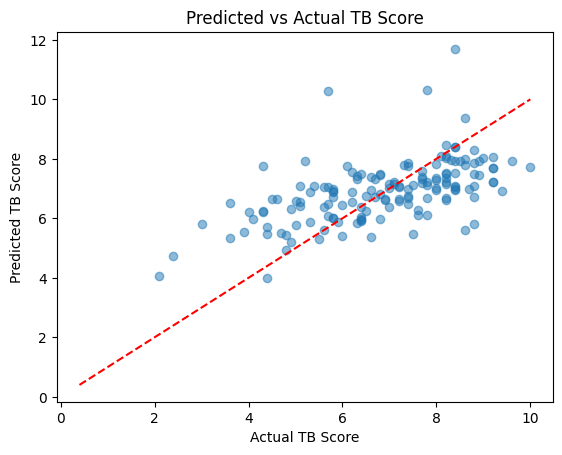

In [29]:
scaler = StandardScaler()

# Prepare features and target for training
X = graded.drop(columns=["student", "TB", "TH", "diemqt", "CK"])  # Drop target and non-feature columns
y = graded['TB'].astype(float) 

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict score
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print("Model coefficients:", lr.coef_)
print("Model intercept:", lr.intercept_)
print("Model score (R^2):", lr.score(X_test_scaled, y_test))

# Draw scatter plots for each score
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual TB Score')
plt.ylabel('Predicted TB Score')
plt.title('Predicted vs Actual TB Score')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.show()

In [30]:
# Chuẩn bị dữ liệu dự đoán cho tất cả sinh viên
all_students = merged_data.copy()

# Nếu có sinh viên chưa có điểm TH, vẫn phải dự đoán cho họ
X_all = all_students.drop(columns=["student", "TB", "TH", "diemqt", "CK"])  # Bỏ cột không cần thiết
X_all_scaled = scaler.transform(X_all)

# Dự đoán điểm
all_students["predicted_TB"] = lr.predict(X_all_scaled)

# Xuất file kết quả: chỉ cần 2 cột student và predicted_TB
all_students[["student", "predicted_TB"]].to_csv("predicted_TB.csv", index=False)
